In [1]:
import pandas as pd
# Load the merged data into a DataFrame
df = pd.read_csv(r'C:\Users\Yibabe\Desktop\kifiyaweek1\data\merged\AMZN_merged_data.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,headline,url,publisher,stock,day_of_week
0,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,Monday
1,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,Monday
2,2009-04-29 00:00:00+00:00,4.1495,4.1495,3.9630,3.9895,3.9895,194702000,0.0,0.0,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,Wednesday
3,2009-05-22 00:00:00+00:00,3.8050,3.8520,3.7510,3.7820,3.7820,69694000,0.0,0.0,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,Friday
4,2009-05-27 00:00:00+00:00,3.9255,3.9750,3.8375,3.8550,3.8550,111342000,0.0,0.0,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,EPS,Wednesday


In [6]:
df.shape

(1324416, 16)

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Ensure 'Close' column is in numeric format
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


In [4]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Convert daily returns to percentage
df['Daily Return (%)'] = df['Daily Return'] * 100


In [5]:
# Drop rows with NaN values in 'Daily Return'
df = df.dropna(subset=['Daily Return'])

# Alternatively, fill NaN values with a placeholder, e.g., 0
# df['Daily Return'].fillna(0, inplace=True)


In [9]:
# Save the DataFrame with daily returns to a new CSV file
df.to_csv(r'C:\Users\Yibabe\Desktop\kifiyaweek1\data\merged\AMZN_merged_data_with_returns.csv', index=False)


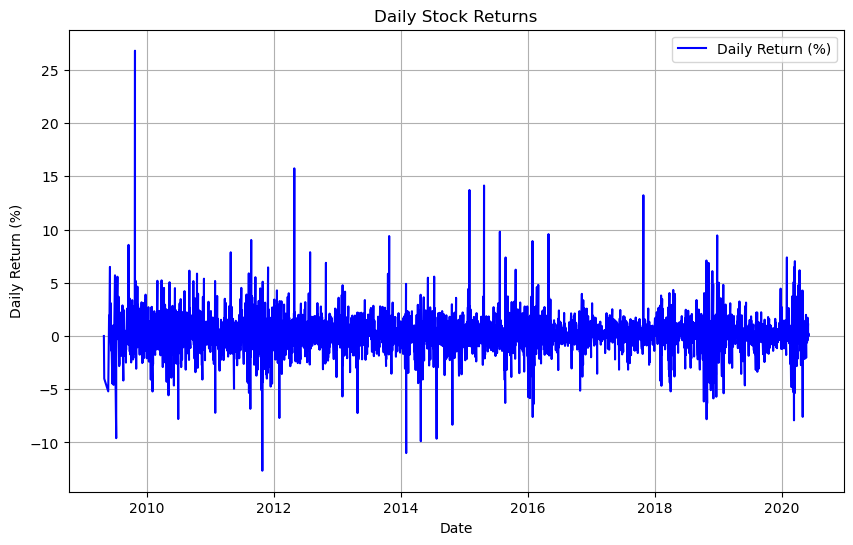

In [10]:
import matplotlib.pyplot as plt

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Return (%)'], label='Daily Return (%)', color='blue')
plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()
